In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",100)
path = "nhanes_2015_2016.csv"

In [3]:
# First, you must import the data from the path given above
df = pd.read_csv(path)

In [4]:
# Next, look at the 'head' of our DataFrame 'df'. 
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,DMDMARTL,DMDHHSIZ,WTINT2YR,SDMVPSU,SDMVSTRA,INDFMPIR,BPXSY1,BPXDI1,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,1.0,2,134671.37,1,125,4.39,128.0,70.0,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,3.0,1,24328.56,1,125,1.32,146.0,88.0,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,1.0,2,12400.01,1,131,1.51,138.0,46.0,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,6.0,1,102718.00,1,131,5.00,132.0,72.0,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,3.0,5,17627.67,2,126,1.23,100.0,70.0,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [5]:
# Lets only consider the feature (or variable) 'BPXSY2'
bp = df['BPXSY2']

In [10]:
# What is the mean of 'BPXSY2'?
bp_m = np.mean(bp)
print("the mean is",bp_m)

the mean is 124.78301716350497


In [8]:
bp = bp.dropna()

In [14]:
bp_median = np.median(bp)
bp_max = np.max(bp)
bp_min = np.min(bp)
bp_stdev = np.std(bp)
bp_var = np.var(bp)

In [15]:
print(f"the median of bp is {bp_median}\n"
     f"the max of bp is {bp_max}\n"
     f"the min of bp is {bp_min}\n"
     f"the stdev of bp is {bp_stdev}\n"
     f"the variance of bp is {bp_var}\n")

the median of bp is 122.0
the max of bp is 238.0
the min of bp is 84.0
the stdev of bp is 18.525338021233786
the variance of bp is 343.1881488009701



In [16]:
# Find the difference of an element in 'bp' compared with the previous element in 'bp'.
# Using the fact that 'bp' is a pd.Series object, can use the pd.Series method diff()
# call this method by: pd.Series.diff()
diff_by_series_method = bp.diff()
diff_by_series_method.values

array([ nan,  16.,  -8., ...,  30., -40.,   8.])

In [17]:
bp_iqr = stats.iqr(bp) 
bp_iqr

22.0

In [19]:
# use the Series.describe() method to see some descriptive statistics of our Series 'bp'
bp_descriptive_stats = bp.describe()
bp_descriptive_stats

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

Text(0.5, 1.0, 'Histogram of BPXSY2')

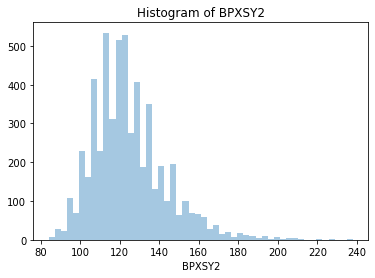

In [21]:
# Make a histogram of our 'bp' data using the seaborn library we imported as 'sns'
sns.distplot(bp, kde = False).set_title("Histogram of BPXSY2")

Text(0.5, 1.0, 'Boxplot of BPXSY2')

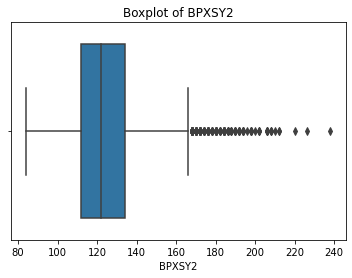

In [22]:
# Make a boxplot of our 'bp' data using the seaborn library. Make sure it has a title and labels!
sns.boxplot(bp).set_title("Boxplot of BPXSY2")